In [19]:
import numpy as np
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
class Operation():
    def __init__(self, input_nodes=[]):
        self.input_nodes = input_nodes
        self.output_nodes = []
        for node in self.input_nodes:
            node.output_nodes.append(self)
        _default_graph.operations.append(self)
            
    def compute():
        pass
    
class add(Operation):
    def __init__(self, x, y):
        super().__init__([x,y])
    
    def compute(self, x_var, y_var):
        self.input_nodes = [x_var, y_var]
        return x_var + y_var
        
class multiply(Operation):
    def __init__(self, x, y):
        super().__init__([x,y])
    
    def compute(self, x_var, y_var):
        self.input_nodes = [x_var, y_var]
        return x_var * y_var
        
class matmult(Operation):
    def __init__(self, x, y):
        super().__init__([x,y])
    
    def compute(self, x_var, y_var):
        self.input_nodes = [x_var, y_var]
        return x_var.dot(y_var)

In [21]:
class Placeholder():
    def __init__(self):
        self.output_nodes = []
        _default_graph.placeholders.append(self)
        
class Variable():
    def __init__(self, initial_value=None):
        self.value = initial_value
        self.output_nodes = []
        _default_graph.variables.append(self)
        
class Graph():
    def __init__(self, initial_value=None):
        self.placeholders = []
        self.variables = []
        self.operations = []
        
    def set_as_default(self):
        global _default_graph
        _default_graph = self

Create Graph for
z = Ax + b where A = 10 and b = 1:

In [22]:
g = Graph()
g.set_as_default()

In [23]:
A = Variable(10)
b = Variable(1)
x = Placeholder()
y = multiply(A, x)
z = add(y, b)

In [24]:
def traverse_postorder(operation):
    nodes_postorder = []
    def recurse(node):
        if isinstance(node, Operation):
            for input_node in node.input_nodes:
                recurse(input_node)
        nodes_postorder.append(node)
            
    recurse(operation)
    return nodes_postorder

In [25]:
class Session():
    def run(self, operation, feed_dict={}):
        nodes_postorder = traverse_postorder(operation)
        
        for node in nodes_postorder:
            if type(node) == Placeholder:
                node.output = feed_dict[node]
            elif type(node) == Variable:
                node.output = node.value
            else:
                node.inputs = [input_node.output for input_node in node.input_nodes]
                node.output = node.compute(*node.inputs)
                
            if type(node.output) == list:
                node.output = np.array(node.output)
            
        return operation.output

In [26]:
sess = Session()
result = sess.run(operation=z, feed_dict={x:10})

In [27]:
print(result)

101


In [28]:
g = Graph()
g.set_as_default()

A = Variable([[10,20],[30,40]])
b = Variable([1,2])
x = Placeholder()
y = matmult(A, x)
z = add(y, b)

In [29]:
sess = Session()
result = sess.run(operation=z, feed_dict={x:10})
print(result)

[[101 202]
 [301 402]]


## Classification example

In [42]:
class Sigmoid(Operation):
    def __init__(self, z):
        super().__init__([z])
        
    def compute(self, z_var):
        return 1/(1+np.exp(-z_var))
    


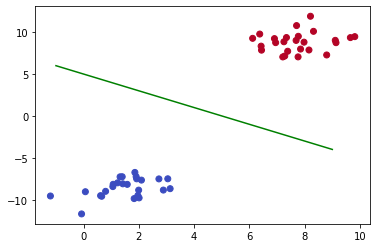

In [31]:
from sklearn.datasets import make_blobs
data = make_blobs(n_samples=50, n_features=2, centers=2, random_state=75)
features, labels = data[0], data[1]
plt.scatter(features[:,0], features[:,1], c=labels, cmap='coolwarm')

x = np.arange(-1,10)
y = -x + 5
plt.plot(x,y, c='green')

In [32]:
np.array([[[1,2],[3,4]]]).shape

(1, 2, 2)

### Equation to apply: (1,1)*f - 5 = 0

In [43]:
g = Graph()
g.set_as_default()
w = Variable([1,1])
b = Variable(-5)
x = Placeholder()
z = add(matmult(w,x),b)
a = Sigmoid(z)

In [45]:
sess = Session()
sess.run(a, feed_dict={x:[8,10]})

0.999997739675702